![picture](https://raw.githubusercontent.com/CVilaNet/PCDAyac/main/imgintro.JPG)

## 0. Carga de Datos y Depuración
Realizamos la carga de los datos a partir de multiples archivos xlsx origen, que si bien tienen la misma estructura, los datos presentan formatos que deben ser afiados.

### Carga de Datos
A partir del repositorio Git en el cual se encuentran todos los archivos xlsx origen.

In [1]:
import pandas as pd

path = 'https://github.com/CVilaNet/PCDAyac/raw/main/Data/'
ExcelFiles = 91
ExcelPrefi = '00'
dataAll = pd.DataFrame 

for i in range(ExcelFiles):
  if(i+1 > 99): ExcelPrefi = ''
  elif(i+1 > 9): ExcelPrefi = '0'

  #dataFile = pd.read_excel(ExcelPrefi + str(i+1) + '.xlsx')
  dataFile = pd.read_excel(path + ExcelPrefi + str(i+1) + '.xlsx')

  if i==0: dataAll = dataFile.copy()
  else: dataAll = pd.concat([dataAll, dataFile])

print('Nro. Registros: ' + str(len(dataAll)))

Nro. Registros: 8779


In [2]:
dataAll.shape

(8779, 44)

### Procesando la **Fecha de Nacimiento**
Se puede notar que se tienen nombres de columnas con diferentes denominaciones, acarreado desde los archivos origen de datos, lo cual es neceario estandarizar y rescatar los valores en una única columna.

In [3]:
# Procesando la fecha de nacimiento (dia - mes - año)
dataAll[''] = pd.to_numeric(dataAll['NAC-DIA'])
dataAll[''] = pd.to_numeric(dataAll['NAC-DIA'])
dataAll['NAC-AÑO'] = pd.to_numeric(dataAll['NAC-DIA'])

dataAll['NACDIA'].fillna(0, inplace=True)
dataAll['NACMES'].fillna(0, inplace=True)
dataAll['NACANIO'].fillna(0, inplace=True)
dataAll['NAC-DIA'].fillna(0, inplace=True)
dataAll['NAC-MES'].fillna(0, inplace=True)
dataAll['NAC-AÑO'].fillna(0, inplace=True)

dataAll['NACDIA'] = dataAll['NACDIA'] + dataAll['NAC-DIA']
dataAll['NACMES'] = dataAll['NACMES'] + dataAll['NAC-MES']
dataAll['NACANIO'] = dataAll['NACANIO'] + dataAll['NAC-AÑO']

dataAll.drop(['N°', 'NAC-DIA', 'NAC-MES', 'NAC-AÑO'], inplace=True, axis=1)

dataAll['NACDIA'] = dataAll['NACDIA'].astype(int)
dataAll['NACMES'] = dataAll['NACMES'].astype(int)
dataAll['NACANIO'] = dataAll['NACANIO'].astype(int)

#dataAll.head()

### Realizando el **Cálculo de la Edad**
1.   Realizamos el cálculo de la edad de las PCDs
2.   Eliminando Indices duplicados
3.   Depuramos las edades que no sea razonables




In [4]:
# 1. Calculando la edad de la Personas con Discapacidad - PCDs
from datetime import datetime as dt

currentYear = dt.now().year
dataAll['EDAD'] = currentYear - dataAll['NACANIO']

In [5]:
# 2.   Eliminando Indices duplicados
dataAll.iloc[97:102]

,N° DNI,APEPATERNO,APEMATRNO,NOMBRES,SEXO,NACDIA,NACMES,NACANIO,"NIVEL DE INSTRUCCIÓN (Inicial, primaria, secundaria, superior)",NIVEL SOCIOECONÓMICO SISFHO,...,DISTRITO/DOMICILIO,ANEXO/CENTRO POBLADO \n(DOMICILIO),CELULAR DE LA PCD,DIACADUCIDAD CERTIFICADO,MESCADUCIDAD CERTIFICADO,ANIOCADUCIDAD,¿ CUENTA CON \nCARNE CONADIS?,Unnamed: 24,,EDAD
19,28813807.0,BORDA,CABEZAS,EUGENIA,F,15,11,1958,NINGUNO,POBRE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65
20,28813932.0,SALCEDO,CABEZAS,FRANCISCO EUSEBIO,M,4,10,1969,NINGUNO,POBRE EXTREMO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54
0,63412331.0,GUTIERREZ,VARGAS,Frank Crish,M,9,10,2012,NaN,POBRE EXTREMO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
1,71727905.0,RAMIREZ,HUAMAN,Cleber Yenderson,M,18,5,2003,NaN,POBRE EXTREMO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
2,76917177.0,GAMBOA,BARBOZA,ROSALINDA,F,26,4,2005,NaN,POBRE EXTREMO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18


In [6]:
dataAll.reset_index(drop=True, inplace=True)
dataAll.iloc[97:102]

,N° DNI,APEPATERNO,APEMATRNO,NOMBRES,SEXO,NACDIA,NACMES,NACANIO,"NIVEL DE INSTRUCCIÓN (Inicial, primaria, secundaria, superior)",NIVEL SOCIOECONÓMICO SISFHO,...,DISTRITO/DOMICILIO,ANEXO/CENTRO POBLADO \n(DOMICILIO),CELULAR DE LA PCD,DIACADUCIDAD CERTIFICADO,MESCADUCIDAD CERTIFICADO,ANIOCADUCIDAD,¿ CUENTA CON \nCARNE CONADIS?,Unnamed: 24,,EDAD
97,28813807.0,BORDA,CABEZAS,EUGENIA,F,15,11,1958,NINGUNO,POBRE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65
98,28813932.0,SALCEDO,CABEZAS,FRANCISCO EUSEBIO,M,4,10,1969,NINGUNO,POBRE EXTREMO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54
99,63412331.0,GUTIERREZ,VARGAS,Frank Crish,M,9,10,2012,NaN,POBRE EXTREMO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
100,71727905.0,RAMIREZ,HUAMAN,Cleber Yenderson,M,18,5,2003,NaN,POBRE EXTREMO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
101,76917177.0,GAMBOA,BARBOZA,ROSALINDA,F,26,4,2005,NaN,POBRE EXTREMO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18


In [7]:
# 3. Eliminando los registros cuyas edades no son razonables
condicionEdad = "(NACANIO < 1922)"

indexEdad = dataAll.query(condicionEdad).index
print('Nro. Registros inicial   : ' + str(len(dataAll)))
print('Nro. Registros a eliminar: ' + str(len(indexEdad)))

dataAll.drop(indexEdad, inplace=True)
print('Nro. Registros final     : ' + str(len(dataAll)))

dataAll.reset_index(drop=True, inplace=True)

Nro. Registros inicial   : 8779
Nro. Registros a eliminar: 94
Nro. Registros final     : 8685


In [8]:
condicionEdad = "(NACANIO > 2022)"

indexEdad = dataAll.query(condicionEdad).index
print('Nro. Registros inicial   : ' + str(len(dataAll)))
print('Nro. Registros a eliminar: ' + str(len(indexEdad)))

dataAll.drop(indexEdad, inplace=True)
print('Nro. Registros final     : ' + str(len(dataAll)))

dataAll.reset_index(drop=True, inplace=True)

Nro. Registros inicial   : 8685
Nro. Registros a eliminar: 2
Nro. Registros final     : 8683


### **Depurado** Columnas
Durante la carga de datos, se ingresaron multiples denominaciones para columnas que describen lo mismo, se procederá a unificar y depurar dichas columnas.
1. Renombrando las columnas a una extensión menor
2. Eliminando los valores **NaN**
3. Rescatando los valores en una única columna
4. Eliminando los campos duplicados e irrelevantes

In [9]:
# 1. Renombrando las columnas a una extensión menor
#dataTemp = dataAll.copy(deep=True)
#dataAll = dataTemp.copy(deep=True)
dataAll.columns

Index(['N° DNI', 'APEPATERNO', 'APEMATRNO', 'NOMBRES', 'SEXO', 'NACDIA',
       'NACMES', 'NACANIO',
       'NIVEL DE INSTRUCCIÓN (Inicial, primaria, secundaria, superior)',
       'NIVEL SOCIOECONÓMICO  SISFHO', '¿CUENTA CON CERTIFICACIÓN?',
       'TIPO DE DISCAPACIDAD', 'NIVEL DE DISCAPACIDAD',
       '¿CUENTA CON CARNE CONADIS?', 'DEPARTAMENTO', 'PROVINCIA',
       'DISTRITO DOMICILIO', 'ANEXO / CENTRO POBLADO (DOMICILIO)',
       'DIRECCION DOMICILIARIA', 'CELULAR DE LA PCD',
       'DIACADUCIDADCERTIFICADO', 'MESCADUCIDADCERTIFICADO',
       'ANIOCADUCIDADCERTIFICADO',
       'NIVEL DE INSTRUCCIÓN (Inicial; primaria; secundaria; superior)', 'DNI',
       'NOMBRE',
       'NIVEL DE INSTRUCCIÓN (Inicial,\n primaria, secundaria, superios)',
       'NIVEL \nSOCIOECONOMICO', '¿CUENTA CON \nCERTIFICADO?',
       'TIPO DE \nDISCAPACIDAD', 'NIVEL DE \nDISCAPACIDAD',
       '¿ CUENTA COM \nCARNE  CONADIS?', 'DISTRITO/DOMICILIO',
       'ANEXO/CENTRO POBLADO \n(DOMICILIO)', 'CELULAR DE  LA

In [10]:
dataAll.rename(columns = {'N° DNI':'DNI',
                          'TIPO DE \nDISCAPACIDAD':'TIPO DE DISCAPACIDAD2',
                          'NIVEL DE \nDISCAPACIDAD':'NIVEL DE DISCAPACIDAD2',
                          'NIVEL DE INSTRUCCIÓN (Inicial, primaria, secundaria, superior)':'INSTRUCCION1', 
                          'NIVEL DE INSTRUCCIÓN (Inicial; primaria; secundaria; superior)':'INSTRUCCION2', 
                          'NIVEL DE INSTRUCCIÓN (Inicial,\n primaria, secundaria, superios)':'INSTRUCCION3',
                          'NIVEL SOCIOECONÓMICO  SISFHO':'SISFHO',
                          'NIVEL \nSOCIOECONOMICO':'SISFHO2',
                          '¿CUENTA CON CERTIFICACIÓN?':'CERTIFICADO',
                          '¿CUENTA CON \nCERTIFICADO?':'CERTIFICADO2',
                          '¿CUENTA CON CARNE CONADIS?':'CONADIS',
                          '¿ CUENTA COM \nCARNE  CONADIS?':'CONADIS2',
                          '¿ CUENTA CON \nCARNE  CONADIS?':'CONADIS3',
                          'CELULAR DE LA PCD':'CELULAR',
                          'CELULAR DE  LA PCD':'CELULAR2',
                          'DISTRITO DOMICILIO':'DISTRITO',
                          'DISTRITO/DOMICILIO':'DISTRITO2',
                          'DIRECCION DOMICILIARIA':'DOMICILIO',
                          'ANEXO / CENTRO POBLADO (DOMICILIO)':'ANEXO',
                          'ANEXO/CENTRO POBLADO \n(DOMICILIO)':'ANEXO2'}, inplace = True)

dataAll.columns

Index(['DNI', 'APEPATERNO', 'APEMATRNO', 'NOMBRES', 'SEXO', 'NACDIA', 'NACMES',
       'NACANIO', 'INSTRUCCION1', 'SISFHO', 'CERTIFICADO',
       'TIPO DE DISCAPACIDAD', 'NIVEL DE DISCAPACIDAD', 'CONADIS',
       'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'ANEXO', 'DOMICILIO',
       'CELULAR', 'DIACADUCIDADCERTIFICADO', 'MESCADUCIDADCERTIFICADO',
       'ANIOCADUCIDADCERTIFICADO', 'INSTRUCCION2', 'DNI', 'NOMBRE',
       'INSTRUCCION3', 'SISFHO2', 'CERTIFICADO2', 'TIPO DE DISCAPACIDAD2',
       'NIVEL DE DISCAPACIDAD2', 'CONADIS2', 'DISTRITO2', 'ANEXO2', 'CELULAR2',
       'DIACADUCIDAD CERTIFICADO', 'MESCADUCIDAD CERTIFICADO', 'ANIOCADUCIDAD',
       'CONADIS3', 'Unnamed: 24', '', 'EDAD'],
      dtype='object')

In [11]:
# 2. Eliminando los valores NaN
dataAll['TIPO DE DISCAPACIDAD'] = dataAll['TIPO DE DISCAPACIDAD'].fillna('')
dataAll['TIPO DE DISCAPACIDAD2'] = dataAll['TIPO DE DISCAPACIDAD2'].fillna('')
dataAll['NIVEL DE DISCAPACIDAD'] = dataAll['NIVEL DE DISCAPACIDAD'].fillna('')
dataAll['NIVEL DE DISCAPACIDAD2'] = dataAll['NIVEL DE DISCAPACIDAD2'].fillna('')
dataAll['CELULAR'] = dataAll['CELULAR'].fillna('')
dataAll['CELULAR2'] = dataAll['CELULAR2'].fillna('')
dataAll['INSTRUCCION1'] = dataAll['INSTRUCCION1'].fillna('')
dataAll['INSTRUCCION2'] = dataAll['INSTRUCCION2'].fillna('')
dataAll['INSTRUCCION3'] = dataAll['INSTRUCCION3'].fillna('')
dataAll['SISFHO'] = dataAll['SISFHO'].fillna('')
dataAll['SISFHO2'] = dataAll['SISFHO2'].fillna('')
dataAll['CERTIFICADO'] = dataAll['CERTIFICADO'].fillna('')
dataAll['CERTIFICADO2'] = dataAll['CERTIFICADO2'].fillna('')
dataAll['CONADIS'] = dataAll['CONADIS'].fillna('')
dataAll['CONADIS2'] = dataAll['CONADIS2'].fillna('')
dataAll['CONADIS3'] = dataAll['CONADIS3'].fillna('')
dataAll['DISTRITO'] = dataAll['DISTRITO'].fillna('')
dataAll['DISTRITO2'] = dataAll['DISTRITO2'].fillna('')
dataAll['ANEXO'] = dataAll['ANEXO'].fillna('')
dataAll['ANEXO2'] = dataAll['ANEXO2'].fillna('')

In [12]:
# 3. Rescatando los valores en una única columna
dataAll['TIPO DE DISCAPACIDAD'] = dataAll['TIPO DE DISCAPACIDAD'] + dataAll['TIPO DE DISCAPACIDAD2']
dataAll['NIVEL DE DISCAPACIDAD'] = dataAll['NIVEL DE DISCAPACIDAD'] + dataAll['NIVEL DE DISCAPACIDAD2']
dataAll['SISFHO'] = dataAll['SISFHO'] + dataAll['SISFHO2']
dataAll['CERTIFICADO'] = dataAll['CERTIFICADO'] + dataAll['CERTIFICADO2']
dataAll['CONADIS'] = dataAll['CONADIS'] + dataAll['CONADIS2'] + dataAll['CONADIS3']
dataAll['DISTRITO'] = dataAll['DISTRITO'] + dataAll['DISTRITO2']
dataAll['INSTRUCCION'] = dataAll['INSTRUCCION1'] + dataAll['INSTRUCCION2'] + dataAll['INSTRUCCION3']

In [13]:
# 4. Eliminando los campos duplicados e irrelevantes
dataAll.drop(['TIPO DE DISCAPACIDAD2', 'NIVEL DE DISCAPACIDAD2', 'CELULAR', 'CELULAR2', 'SISFHO2', 
              'CERTIFICADO2', 'CONADIS2', 'CONADIS3', 'DISTRITO2', 'ANEXO', 'ANEXO2', 'INSTRUCCION1', 
              'INSTRUCCION2', 'INSTRUCCION3', '', 
              'DOMICILIO', 'DIACADUCIDADCERTIFICADO',
              'MESCADUCIDADCERTIFICADO', 'ANIOCADUCIDADCERTIFICADO', 'DNI', 'NOMBRE', 'APEPATERNO', 'APEMATRNO', 'NOMBRES',
              'DIACADUCIDAD CERTIFICADO', 'MESCADUCIDAD CERTIFICADO', 'ANIOCADUCIDAD', 'Unnamed: 24'], inplace=True, axis=1)
dataAll.columns

Index(['SEXO', 'NACDIA', 'NACMES', 'NACANIO', 'SISFHO', 'CERTIFICADO',
       'TIPO DE DISCAPACIDAD', 'NIVEL DE DISCAPACIDAD', 'CONADIS',
       'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'EDAD', 'INSTRUCCION'],
      dtype='object')

In [14]:
dataAll.shape

(8683, 14)

In [15]:
dataAll.head()

,SEXO,NACDIA,NACMES,NACANIO,SISFHO,CERTIFICADO,TIPO DE DISCAPACIDAD,NIVEL DE DISCAPACIDAD,CONADIS,DEPARTAMENTO,PROVINCIA,DISTRITO,EDAD,INSTRUCCION
0,M,27,3,1988,POBRE,X,INTELECTUAL,SEVERA,X,AYACUCHO,SUCRE,CHILCAYOC,35,NINGUNO
1,M,16,7,1993,POBRE,X,FÍSICA,SEVERA,X,AYACUCHO,SUCRE,CHILCAYOC,30,SECUNDARIA COMPLETA
2,F,20,5,1940,POBRE EXTREMO,X,INTELECTUAL,SEVERA,X,AYACUCHO,SUCRE,CHILCAYOC,83,NINGUNO
3,F,9,3,2017,POBRE,X,FÍSICA,SEVERA,X,AYACUCHO,SUCRE,CHILCAYOC,6,INICIAL
4,M,20,2,1972,POBRE EXTREMO,X,INTELECTUAL,SEVERA,X,AYACUCHO,SUCRE,CHILCAYOC,51,PRIMARIA INCOMPLETA


In [ ]:
dataAll.to_csv('dataPCD.csv')

## 1. Carga de **DataFrame** y Limpieza
En los pasos previos se proceso data de los diferentes archivos XLSX (*origenes de datos*), eliminando información irrelevante para efectos del presente análisis.
A partir de esta sección se trabajará con el DataFrame depurado y con data relevante, cuya fuente CSV se encuentra para su revisión en el GitHub.

In [1]:
import pandas as pd

path = 'https://github.com/CVilaNet/PCDAyac/raw/main/Data/'
name = 'dataPCD.csv'

dataAll = pd.read_csv(path + name)
dataAll.shape

(8683, 15)

In [2]:
dataAll.head()

,Unnamed: 0,SEXO,NACDIA,NACMES,NACANIO,SISFHO,CERTIFICADO,TIPO DE DISCAPACIDAD,NIVEL DE DISCAPACIDAD,CONADIS,DEPARTAMENTO,PROVINCIA,DISTRITO,EDAD,INSTRUCCION
0,0,M,27,3,1988,POBRE,X,INTELECTUAL,SEVERA,X,AYACUCHO,SUCRE,CHILCAYOC,35,NINGUNO
1,1,M,16,7,1993,POBRE,X,FÍSICA,SEVERA,X,AYACUCHO,SUCRE,CHILCAYOC,30,SECUNDARIA COMPLETA
2,2,F,20,5,1940,POBRE EXTREMO,X,INTELECTUAL,SEVERA,X,AYACUCHO,SUCRE,CHILCAYOC,83,NINGUNO
3,3,F,9,3,2017,POBRE,X,FÍSICA,SEVERA,X,AYACUCHO,SUCRE,CHILCAYOC,6,INICIAL
4,4,M,20,2,1972,POBRE EXTREMO,X,INTELECTUAL,SEVERA,X,AYACUCHO,SUCRE,CHILCAYOC,51,PRIMARIA INCOMPLETA


### **Limpieza** de datos - *Formateo*
Los datos cargados muestran formatos diferentes (entre str e int) y contienen caracteres en blanco, ya sea antes o despues de la cadena.
1. Eliminado de los caracteres en blanco y estandarizando los **TIPOS DE DISCAPACIDAD**
2. Estandarizando los tipos de discapacidad (Física e Intelectual) - Segun el MINSA
3. Estandarizando los datos de **SISFHO**
4. Estandarizando los datos de **INSTRUCCIÓN**
5. Eliminando espacio de los nombres largos
6. Estandarizando los datos de **NIVEL DE DISCAPACIDAD**

In [3]:
# 1. Eliminado de los caracteres en blanco y estandarizando los TIPOS DE DISCAPACIDAD
dataAll['TIPO DE DISCAPACIDAD'] = dataAll['TIPO DE DISCAPACIDAD'].str.strip()
dataAll.groupby(['TIPO DE DISCAPACIDAD'])['TIPO DE DISCAPACIDAD'].count()

TIPO DE DISCAPACIDAD
AUDITIVA                679
AUTISMO EN LA NIÑEZ      27
Auditiva                 47
ESQUIZOFRENIA           265
Esquizofrenia             2
FÍSICA                 3492
FÍsica                   23
Física                  245
INTELECTUAL            2522
Intelectual             162
LENGUAJE                160
Lenguaje                 33
VISUAL                  923
Visual                  103
Name: TIPO DE DISCAPACIDAD, dtype: int64

In [4]:
# 2. Estandarizando los tipos de discapacidad (Física e Intelectual) - Segun el MINSA
discfisica = ['AUDITIVA', 'Auditiva', 'FÍSICA', 'FÍsica', 'Física', 'LENGUAJE', 'Lenguaje', 'VISUAL', 'Visual']
dataAll['DISCAPACIDAD'] = dataAll['TIPO DE DISCAPACIDAD'].apply(lambda x:'FÍSICA' if x in discfisica else 'INTELECTUAL')
dataAll.groupby(['DISCAPACIDAD'])['DISCAPACIDAD'].count()

DISCAPACIDAD
FÍSICA         5705
INTELECTUAL    2978
Name: DISCAPACIDAD, dtype: int64

In [5]:
# 3. Estandarizando los datos de SISFHO
dataAll['SISFHO'] = dataAll['SISFHO'].str.strip()
dataAll.groupby(['SISFHO'])['SISFHO'].count()

SISFHO
NO POBRE          693
No pobre            4
POBRE            2555
POBRE EXTREMO    5228
Pobre              10
Pobre Extremo       7
Pobre extremo      26
SOLICITAR CSE     157
pobre               1
pobre extremo       2
Name: SISFHO, dtype: int64

In [6]:
sisfhoNoPobre = ['NO POBRE', 'No pobre']
sisfhoPobre = ['POBRE', 'Pobre', 'pobre']
sisfhoPobreEx = ['POBRE EXTREMO', 'Pobre Extremo', 'Pobre extremo', 'pobre extremo']

def condicionSisfho(x):
  if x in sisfhoNoPobre:
    return 'NO POBRE'
  elif x in sisfhoPobre:
    return 'POBRE'
  elif x in sisfhoPobreEx:
    return 'POBRE EXTREMO'
  else:
    return 'CSE'

dataAll['SISFHO'] = dataAll['SISFHO'].apply(condicionSisfho)

dataAll.groupby(['SISFHO'])['SISFHO'].count()

SISFHO
CSE               157
NO POBRE          697
POBRE            2566
POBRE EXTREMO    5263
Name: SISFHO, dtype: int64

In [7]:
# 4. Estandarizando los datos de INSTRUCCION
dataAll['INSTRUCCION'] = dataAll['INSTRUCCION'].str.strip()
dataAll.groupby(['INSTRUCCION'])['INSTRUCCION'].count()

INSTRUCCION
INICIAL                   153
NINGUNO                  3996
Ninguno                   184
PRIMARIA COMPLETA         834
PRIMARIA INCOMPLETA      1780
Primaria completa         191
Primaria incompleta        78
SECUNDARIA COMPLETA       484
SECUNDARIA INCOMPLETA     604
SECUNDARIA cOMPLETA         1
SUPERIOR                  228
Secundaria completa        67
Secundaria incompleta      41
Superior                   12
TÉCNICO                    27
Técnico                     2
primaria completa           1
Name: INSTRUCCION, dtype: int64

In [8]:
def condicionInstruccion(x):
  if x in ['INICIAL']:
    return 'INICIAL'
  if x in ['PRIMARIA INCOMPLETA', 'Primaria incompleta']:
    return 'PRIM INCOMPLETA'
  elif x in ['PRIMARIA COMPLETA', 'Primaria completa', 'primaria completa']:
    return 'PRIM COMPLETA'
  elif x in ['SECUNDARIA INCOMPLETA', 'Secundaria incompleta']:
    return 'SEC INCOMPLETA'
  elif x in ['SECUNDARIA COMPLETA', 'SECUNDARIA COMPLETA', 'SECUNDARIA cOMPLETA', 'Secundaria completa']:
    return 'SEC COMPLETA'
  elif x in ['SUPERIOR', 'Superior', 'TÉCNICO', 'Técnico']:
    return 'SUPERIOR'
  else:
    return 'NINGUNO'

dataAll['INSTRUCCION'] = dataAll['INSTRUCCION'].apply(condicionInstruccion)

dataAll.groupby(['INSTRUCCION'])['INSTRUCCION'].count()

INSTRUCCION
INICIAL             153
NINGUNO            4180
PRIM COMPLETA      1026
PRIM INCOMPLETA    1858
SEC COMPLETA        552
SEC INCOMPLETA      645
SUPERIOR            269
Name: INSTRUCCION, dtype: int64

In [9]:
# 5. Eliminando espacio de los nombres largos
dataAll.rename(columns = {'TIPO DE DISCAPACIDAD':'TIPO_DISCAPACIDAD',
                          'NIVEL DE DISCAPACIDAD':'NIVEL_DISCAPACIDAD'}, inplace = True)

In [10]:
dataAll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8683 entries, 0 to 8682
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          8683 non-null   int64 
 1   SEXO                8683 non-null   object
 2   NACDIA              8683 non-null   int64 
 3   NACMES              8683 non-null   int64 
 4   NACANIO             8683 non-null   int64 
 5   SISFHO              8683 non-null   object
 6   CERTIFICADO         7349 non-null   object
 7   TIPO_DISCAPACIDAD   8683 non-null   object
 8   NIVEL_DISCAPACIDAD  8683 non-null   object
 9   CONADIS             6199 non-null   object
 10  DEPARTAMENTO        8683 non-null   object
 11  PROVINCIA           8683 non-null   object
 12  DISTRITO            8683 non-null   object
 13  EDAD                8683 non-null   int64 
 14  INSTRUCCION         8683 non-null   object
 15  DISCAPACIDAD        8683 non-null   object
dtypes: int64(5), object(11)


In [11]:
# 6. Estandarizando los datos de NIVEL DE DISCAPACIDAD
dataAll['NIVEL_DISCAPACIDAD'] = dataAll['NIVEL_DISCAPACIDAD'].str.strip()
dataAll.groupby(['NIVEL_DISCAPACIDAD'])['NIVEL_DISCAPACIDAD'].count()

NIVEL_DISCAPACIDAD
LEVE         634
Leve          12
MODERADA    2567
Moderada      32
SEVERA      5384
Severa        49
severa         5
Name: NIVEL_DISCAPACIDAD, dtype: int64

In [12]:
def condicionNivelDiscapacidad(x):
  if x in ['LEVE', 'Leve', 'leve']:
    return 'LEVE'
  elif x in ['MODERADA', 'Moderada', 'noderada']:
    return 'MODERADA'
  else:
    return 'SEVERA'

dataAll['NIVEL_DISCAPACIDAD'] = dataAll['NIVEL_DISCAPACIDAD'].apply(condicionNivelDiscapacidad)

dataAll.groupby(['NIVEL_DISCAPACIDAD'])['NIVEL_DISCAPACIDAD'].count()

NIVEL_DISCAPACIDAD
LEVE         646
MODERADA    2599
SEVERA      5438
Name: NIVEL_DISCAPACIDAD, dtype: int64

## 2. Asignando **UBIGEO** Distrito
Realizar la carga de código de UBIGEO según el **INEI** y realizando el cruce con los distritos motivo del estudio de la *Región de Ayacucho*

### Lectura de la lista de UBIGEO

In [13]:
dataUbigeo = pd.read_excel(path + 'UBIGEOAyacucho.xlsx')
dataUbigeo.rename(columns = {'CODIGO DEPARTAMENTO':'COD_DEPA', 'CODIGO PROVINCIA':'COD_PROV', 'CODIGO DISTRITO':'COD_DIST'}, inplace = True)
dataUbigeo.head()

,UBIGEO,COD_DEPA,COD_PROV,COD_DIST,DENOMINACION,DEPARTAMENTO,PROVINCIA,DISTRITO
0,50000,5,0,0,AYACUCHO,AYACUCHO,NaN,NaN
1,50100,5,1,0,HUAMANGA,AYACUCHO,HUAMANGA,NaN
2,50101,5,1,1,AYACUCHO,AYACUCHO,HUAMANGA,AYACUCHO
3,50102,5,1,2,ACOCRO,AYACUCHO,HUAMANGA,ACOCRO
4,50103,5,1,3,ACOS VINCHOS,AYACUCHO,HUAMANGA,ACOS VINCHOS


### Formateo y **emparejamiento** del UBIGEO con el data de las PCDs

In [14]:
dataAllUbigeo = pd.merge(dataAll, dataUbigeo, on='DISTRITO').drop(columns=['DENOMINACION', 'DEPARTAMENTO_y', 'PROVINCIA_y'])
dataAllUbigeo.rename(columns = {'DEPARTAMENTO_x':'DEPARTAMENTO', 'PROVINCIA_x':'PROVINCIA'}, inplace = True)

dataAllUbigeo['DEPARTAMENTO'] = dataAllUbigeo['DEPARTAMENTO'].str.strip()
dataAllUbigeo['PROVINCIA'] = dataAllUbigeo['PROVINCIA'].str.strip()
dataAllUbigeo['DISTRITO'] = dataAllUbigeo['DISTRITO'].str.strip()

dataAllUbigeo.columns

Index(['Unnamed: 0', 'SEXO', 'NACDIA', 'NACMES', 'NACANIO', 'SISFHO',
       'CERTIFICADO', 'TIPO_DISCAPACIDAD', 'NIVEL_DISCAPACIDAD', 'CONADIS',
       'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'EDAD', 'INSTRUCCION',
       'DISCAPACIDAD', 'UBIGEO', 'COD_DEPA', 'COD_PROV', 'COD_DIST'],
      dtype='object')

In [15]:
dataAllUbigeo.head()

,Unnamed: 0,SEXO,NACDIA,NACMES,NACANIO,SISFHO,CERTIFICADO,TIPO_DISCAPACIDAD,NIVEL_DISCAPACIDAD,CONADIS,DEPARTAMENTO,PROVINCIA,DISTRITO,EDAD,INSTRUCCION,DISCAPACIDAD,UBIGEO,COD_DEPA,COD_PROV,COD_DIST
0,0,M,27,3,1988,POBRE,X,INTELECTUAL,SEVERA,X,AYACUCHO,SUCRE,CHILCAYOC,35,NINGUNO,INTELECTUAL,50904,5,9,4
1,1,M,16,7,1993,POBRE,X,FÍSICA,SEVERA,X,AYACUCHO,SUCRE,CHILCAYOC,30,SEC COMPLETA,FÍSICA,50904,5,9,4
2,2,F,20,5,1940,POBRE EXTREMO,X,INTELECTUAL,SEVERA,X,AYACUCHO,SUCRE,CHILCAYOC,83,NINGUNO,INTELECTUAL,50904,5,9,4
3,3,F,9,3,2017,POBRE,X,FÍSICA,SEVERA,X,AYACUCHO,SUCRE,CHILCAYOC,6,INICIAL,FÍSICA,50904,5,9,4
4,4,M,20,2,1972,POBRE EXTREMO,X,INTELECTUAL,SEVERA,X,AYACUCHO,SUCRE,CHILCAYOC,51,PRIM INCOMPLETA,INTELECTUAL,50904,5,9,4


In [16]:
dataAllUbigeo.groupby(['COD_PROV','PROVINCIA'])['COD_PROV'].count()

COD_PROV  PROVINCIA     
1         HUAMANGA          2702
2         CANGALLO           911
3         HUANCA SANCOS      417
4         HUANTA            1103
5         LA MAR            1701
6         HUANCA SANCOS      138
          LUCANAS            359
9         SUCRE              330
10        VICTOR FAJARDO     497
11        VILCAS HUAMAN      576
Name: COD_PROV, dtype: int64

In [17]:
dataAllUbigeo.groupby(['UBIGEO','DISTRITO'])['UBIGEO'].count()

UBIGEO  DISTRITO   
50101   AYACUCHO       545
50102   ACOCRO         135
50104   CARMEN ALTO    187
50105   CHIARA         168
50106   OCROS          116
                      ... 
51103   CARHUANCA       40
51104   CONCEPCION      59
51105   HUAMBALPA       50
51107   SAURAMA         53
51108   VISCHONGO       93
Name: UBIGEO, Length: 81, dtype: int64

## 3. Análisis por **Edad** de PCDs **Hombres Vs Mujeres**

### Análisis de datos por Tipo de Discapacidad y Sexo
Realiza un análisis de los tipos de discapacidad y la incidencia entre **Varones** y **Mujeres**

In [18]:
pd.crosstab(dataAllUbigeo.SEXO, dataAllUbigeo.DISCAPACIDAD, margins=True, margins_name='Total')

DISCAPACIDAD,FÍSICA,INTELECTUAL,Total
SEXO,,,
F,2579,1337,3916
M,3190,1628,4818
Total,5769,2965,8734


In [19]:
# Filtrando PCDs con discapacidad Física
condicionFisica = "(DISCAPACIDAD == 'FÍSICA')"
datoFisica = dataAllUbigeo.query(condicionFisica)

# Filtrando PCDs con discapacidad Intelectual
condicionIntelectual = "(DISCAPACIDAD == 'INTELECTUAL')"
datoIntelectual = dataAllUbigeo.query(condicionIntelectual)

In [20]:
datoFisica = pd.crosstab(datoFisica.EDAD, datoFisica.SEXO)
datoInteletual = pd.crosstab(datoIntelectual.EDAD, datoIntelectual.SEXO)
datoEdad = pd.crosstab(dataAllUbigeo.EDAD, dataAllUbigeo.SEXO)
#datoEdad.columns.values.tolist()
#datoEdad.index.tolist()
#datoEdad.M.tolist()
#datoEdad.F.tolist()

### Análisis Gráfico General entre PCDs por Sexo

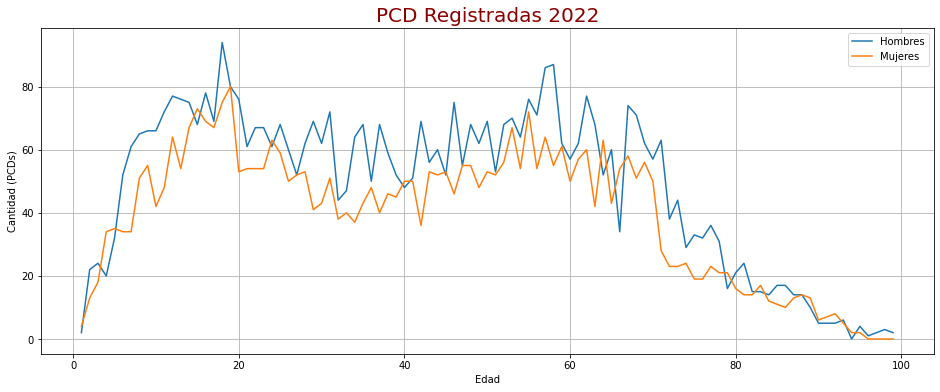

In [21]:
import matplotlib.pyplot as plt

# customized dict for our title
font = {'family': 'sans-serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 20,
        }

# Re-sizing plot area
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(6)

# Adding a title and axis text
plt.title("PCD Registradas 2022", fontdict=font) # UPDATE: pass our dict as parameter
plt.xlabel("Edad")
plt.ylabel("Cantidad (PCDs)")


plt.plot(datoEdad.index.tolist(), datoEdad.M.tolist(), label='Hombres')
plt.plot(datoEdad.index.tolist(), datoEdad.F.tolist(), label='Mujeres')

# add a legend (automatically)
plt.legend()

# adding grid
plt.grid(True)

# display
plt.show()

### Análisis Gráfico por discapacidad Física e Intelectual

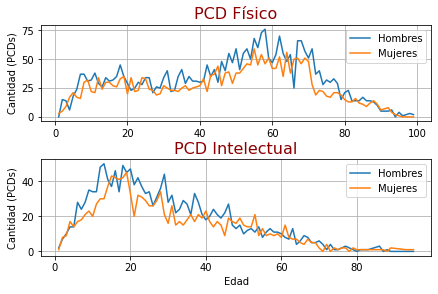

In [22]:
import matplotlib.pyplot as plt

font = {'family': 'sans-serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

plt.subplot(2,1,1)
plt.plot(datoFisica.index.tolist(), datoFisica.M.tolist(), label='Hombres')
plt.plot(datoFisica.index.tolist(), datoFisica.F.tolist(), label='Mujeres')
plt.legend()
plt.grid(True)
plt.title('PCD Físico', fontdict=font)
plt.ylabel("Cantidad (PCDs)")

plt.subplot(2,1,2)
plt.plot(datoInteletual.index.tolist(), datoInteletual.M.tolist(), label='Hombres')
plt.plot(datoInteletual.index.tolist(), datoInteletual.F.tolist(), label='Mujeres')
plt.legend()
plt.grid(True)
plt.title('PCD Intelectual', fontdict=font)
plt.ylabel("Cantidad (PCDs)")
plt.xlabel("Edad")

plt.tight_layout(pad=0.4, w_pad=1, h_pad=0.3) # UPDATE 3: set space manually

plt.show()

## 4. Análisis de PCD en **Distritos** según **IDH**
Se concluye que **NO EXISTE** dependencia o relación directa entre el *Índice de Desarrollo Humano* de un distrito y la cantidad de *Personas con Discapacidad* del mismo.



### **IDH** - Índice de Desarrollo Humano Distrital

In [23]:
dataIDH = pd.read_excel(path + 'IDH2017Distrital.xlsx')
dataIDH.head()

,UBIGEO,NRO,DISTRITO,HABITANTES,IDH,ESPERANZA VIDA AÑOS,SECUNDARIA COPLETA 18AÑOS,AÑOS EDUCACION 25AÑOS,INGRESO FAMILIAR PER CAPITA
0,10101,1,Chachapoyas,32589,0.605711,73.297544,74.699578,9.7582,1086.762736
1,10102,2,Asuncion,262,0.421303,72.349067,66.666667,5.8662,569.610318
2,10103,3,Balsas,1136,0.294232,68.710568,30.769231,4.9866,362.999904
3,10104,4,Cheto,642,0.329549,83.896326,49.019608,4.2735,342.569379
4,10105,5,Chiliquin,585,0.264602,77.261089,34.615385,3.3040,308.814375


### Uniendo las PCDs con IDH por Ubigeo

In [24]:
dataPCDUbigeoIDH = pd.merge(dataAllUbigeo, dataIDH, on='UBIGEO')
dataPCDUbigeoIDH.columns

Index(['Unnamed: 0', 'SEXO', 'NACDIA', 'NACMES', 'NACANIO', 'SISFHO',
       'CERTIFICADO', 'TIPO_DISCAPACIDAD', 'NIVEL_DISCAPACIDAD', 'CONADIS',
       'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO_x', 'EDAD', 'INSTRUCCION',
       'DISCAPACIDAD', 'UBIGEO', 'COD_DEPA', 'COD_PROV', 'COD_DIST', 'NRO',
       'DISTRITO_y', 'HABITANTES', 'IDH', 'ESPERANZA VIDA AÑOS',
       'SECUNDARIA COPLETA 18AÑOS', 'AÑOS EDUCACION 25AÑOS',
       'INGRESO FAMILIAR PER CAPITA'],
      dtype='object')

In [25]:
dataPCDUbigeoIDH.rename(columns = {'DISTRITO_x':'DISTRITO',
                                   'ESPERANZA VIDA AÑOS':'ESPERANZA',
                                   'SECUNDARIA COPLETA 18AÑOS':'SECUNDARIA', 
                                   'AÑOS EDUCACION 25AÑOS':'AÑOS_EDU', 
                                   'INGRESO FAMILIAR PER CAPITA':'INGRESO_PER_CAPITA'}, inplace = True)

dataPCDUbigeoIDH.drop(['NRO', 'DISTRITO_y'], inplace=True, axis=1)

In [26]:
dataPCDUbigeoIDH.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8734 entries, 0 to 8733
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          8734 non-null   int64  
 1   SEXO                8734 non-null   object 
 2   NACDIA              8734 non-null   int64  
 3   NACMES              8734 non-null   int64  
 4   NACANIO             8734 non-null   int64  
 5   SISFHO              8734 non-null   object 
 6   CERTIFICADO         7448 non-null   object 
 7   TIPO_DISCAPACIDAD   8734 non-null   object 
 8   NIVEL_DISCAPACIDAD  8734 non-null   object 
 9   CONADIS             6219 non-null   object 
 10  DEPARTAMENTO        8734 non-null   object 
 11  PROVINCIA           8734 non-null   object 
 12  DISTRITO            8734 non-null   object 
 13  EDAD                8734 non-null   int64  
 14  INSTRUCCION         8734 non-null   object 
 15  DISCAPACIDAD        8734 non-null   object 
 16  UBIGEO

### Análisis gráfico de relación

In [27]:
ubigeoPCD = pd.crosstab(dataPCDUbigeoIDH.UBIGEO, dataPCDUbigeoIDH.SEXO, margins=True, margins_name='TotalPCD')
ubigeoPCD.columns

Index(['F', 'M', 'TotalPCD'], dtype='object', name='SEXO')

In [28]:
distritoPCD_IDH = pd.merge(ubigeoPCD, dataIDH, on='UBIGEO')
distritoPCD_IDH.columns

Index(['UBIGEO', 'F', 'M', 'TotalPCD', 'NRO', 'DISTRITO', 'HABITANTES', 'IDH',
       'ESPERANZA VIDA AÑOS', 'SECUNDARIA COPLETA 18AÑOS',
       'AÑOS EDUCACION 25AÑOS', 'INGRESO FAMILIAR PER CAPITA'],
      dtype='object')

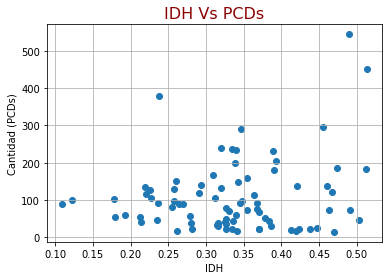

In [29]:
import matplotlib.pyplot as plt

# customized dict for our title
font = {'family': 'sans-serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
        
# Adding a title and axis text
plt.title("IDH Vs PCDs", fontdict=font)
plt.xlabel("IDH")
plt.ylabel("Cantidad (PCDs)")

plt.scatter(distritoPCD_IDH.IDH, distritoPCD_IDH.TotalPCD)

# adding grid
plt.grid(True)

# display
plt.show()

## 5. Nivel de Educación Vs SISFHO

In [30]:
datoInstrucion = pd.crosstab(dataAllUbigeo.INSTRUCCION, dataAllUbigeo.SISFHO, margins=True, margins_name='Total')
datoSisfho = pd.crosstab(dataAllUbigeo.SISFHO, dataAllUbigeo.INSTRUCCION, margins=True, margins_name='Total')
datoSisfho

INSTRUCCION,INICIAL,NINGUNO,PRIM COMPLETA,PRIM INCOMPLETA,SEC COMPLETA,SEC INCOMPLETA,SUPERIOR,Total
SISFHO,,,,,,,,
CSE,2,65,13,15,20,10,31,156
NO POBRE,18,269,79,107,77,51,95,696
POBRE,54,1078,341,507,230,261,97,2568
POBRE EXTREMO,80,2754,605,1254,243,326,52,5314
Total,154,4166,1038,1883,570,648,275,8734


### Análisis Visual: PCDs - SISFHO
Se evidencia que se tiene un mayor número de **PCDs** (*Personas con Discapacidad*) en grupos de **POBREZA EXTREMA**

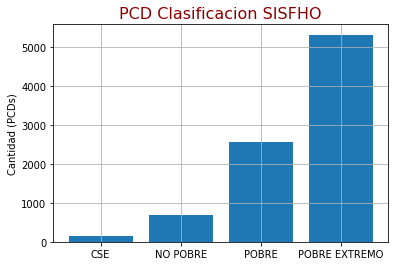

In [31]:
plt.title("PCD Clasificacion SISFHO", fontdict=font) # UPDATE: pass our dict as parameter
plt.ylabel("Cantidad (PCDs)")

plt.bar(datoSisfho.index.tolist()[0:len(datoSisfho.index.tolist())-1], datoSisfho.Total.tolist()[0:len(datoSisfho.Total.tolist())-1])

plt.grid(True)
plt.show()

### Análisis Visual: PCDs - Nivel de Instrucción
Se evidencia lo siguiente:

1.   Mayor número de **PCDs** (*Personas con Discapacidad*) en grupos de personas con **Ningún Nivel de Instrucción**
2.   Un grupo de considerable de **PCDs** en personas con solo Primaria concluida o que presentan estudios inconclusos (primaria y secundaria).
3.   Un mínimo grupo de **PCDs** con estudios consluidos de educación secundaria y/o educación superior.



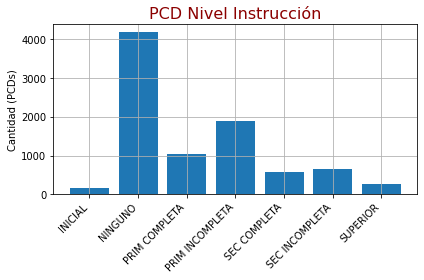

In [32]:
plt.title("PCD Nivel Instrucción", fontdict=font) # UPDATE: pass our dict as parameter
plt.ylabel("Cantidad (PCDs)")

plt.bar(datoInstrucion.index.tolist()[0:len(datoInstrucion.index.tolist())-1], datoInstrucion.Total.tolist()[0:len(datoInstrucion.Total.tolist())-1])

plt.xticks(rotation = 45, horizontalalignment='right', verticalalignment='top', rotation_mode='default') # Rotates X-Axis Ticks by 45-degrees
plt.tight_layout()

plt.grid(True)
plt.show()

### Análisis Visual: PCDs - SISFHO Vs Nivel Instrucción
Se evidencia que el mayor número de **PCDs** (*Personas con Discapacidad*) se encientran acentuadas en los niveles de pobreza extremos con una directa relación en personas de menor grado de instrucción.

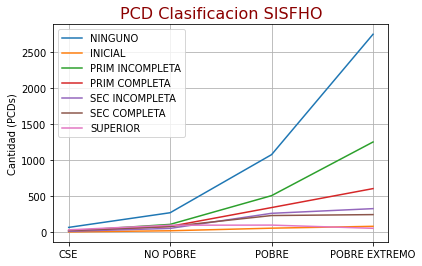

In [33]:
import matplotlib.pyplot as plt

datoSisfho2 = pd.crosstab(dataAllUbigeo.SISFHO, dataAllUbigeo.INSTRUCCION, margins=False)

# Adding a title and axis text
plt.title("PCD Clasificacion SISFHO", fontdict=font) # UPDATE: pass our dict as parameter
plt.ylabel("Cantidad (PCDs)")

plt.plot(datoSisfho2.index.tolist(), datoSisfho2['NINGUNO'].tolist(), label='NINGUNO')
plt.plot(datoSisfho2.index.tolist(), datoSisfho2['INICIAL'].tolist(), label='INICIAL')
plt.plot(datoSisfho2.index.tolist(), datoSisfho2['PRIM INCOMPLETA'].tolist(), label='PRIM INCOMPLETA')
plt.plot(datoSisfho2.index.tolist(), datoSisfho2['PRIM COMPLETA'].tolist(), label='PRIM COMPLETA')
plt.plot(datoSisfho2.index.tolist(), datoSisfho2['SEC INCOMPLETA'].tolist(), label='SEC INCOMPLETA')
plt.plot(datoSisfho2.index.tolist(), datoSisfho2['SEC COMPLETA'].tolist(), label='SEC COMPLETA')
plt.plot(datoSisfho2.index.tolist(), datoSisfho2['SUPERIOR'].tolist(), label='SUPERIOR')

# add a legend (automatically)
plt.legend()

# adding grid
plt.grid(True)

# display
plt.show()

### Análisis Visual: PCDs - POBRE EXTREMO Vs Instrucción NINGUNA
Analisando la data se evidencia que la mayor cantidad de personas con discapacidad se encuentra en una población en EXTREMO POBRE (SISFHO) y con NINGÚN nivel de instrucción (analfabetos) o que presentaron deserción escolar en el nivel primario de la educación básica regular.
Evidenciandose que este grupo presenta un discapacidad **SEVERA** en un gran porcentaje.

In [34]:
condicionFiltro = "((SISFHO == 'POBRE EXTREMO') & (INSTRUCCION == 'NINGUNO' | INSTRUCCION == 'PRIM INCOMPLETA'))"
dataPCDExtremos = dataAllUbigeo.query(condicionFiltro)
dataPCDExtremos.shape

(4008, 20)

In [35]:
datoPCDExtremo = pd.crosstab(dataPCDExtremos.EDAD, dataPCDExtremos.NIVEL_DISCAPACIDAD)
datoPCDExtremo.head()

NIVEL_DISCAPACIDAD,LEVE,MODERADA,SEVERA
EDAD,,,
1,0,0,1
2,4,1,13
3,0,1,18
4,2,1,20
5,2,5,19


In [36]:
edades = datoPCDExtremo.index.tolist()
len(edades), edades[0], edades[len(edades)-1]

(96, 1, 98)

In [37]:
datoPCDExtremo.to_dict('dict').keys()

dict_keys(['LEVE', 'MODERADA', 'SEVERA'])

In [38]:
datoPCDExtremo_dic = datoPCDExtremo.to_dict('list')
datoPCDExtremo_dic.values()

dict_values([[0, 4, 0, 2, 2, 1, 0, 5, 1, 3, 2, 6, 2, 4, 3, 0, 2, 5, 5, 1, 2, 2, 2, 1, 1, 0, 0, 2, 4, 0, 0, 2, 2, 1, 3, 0, 0, 0, 3, 0, 4, 0, 2, 1, 0, 6, 1, 2, 1, 4, 1, 6, 5, 3, 5, 2, 2, 4, 3, 2, 3, 4, 2, 3, 4, 2, 4, 6, 1, 12, 6, 3, 6, 4, 2, 0, 1, 2, 0, 3, 2, 2, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 2, 0, 1, 0], [0, 1, 1, 1, 5, 10, 5, 2, 7, 8, 10, 16, 8, 14, 8, 2, 11, 9, 10, 10, 11, 9, 8, 10, 9, 8, 6, 4, 8, 4, 8, 6, 5, 7, 6, 4, 9, 12, 9, 11, 12, 13, 11, 18, 13, 20, 18, 20, 15, 10, 21, 6, 18, 17, 15, 12, 27, 20, 13, 16, 24, 25, 14, 18, 18, 18, 23, 23, 27, 20, 19, 18, 15, 8, 11, 12, 13, 9, 9, 19, 4, 5, 8, 3, 7, 5, 9, 5, 5, 2, 6, 2, 3, 1, 1, 1], [1, 13, 18, 20, 19, 23, 20, 43, 42, 35, 45, 46, 46, 46, 44, 43, 39, 42, 24, 40, 36, 32, 33, 40, 39, 37, 33, 47, 43, 36, 44, 27, 28, 38, 40, 40, 39, 40, 32, 35, 29, 33, 35, 43, 36, 38, 31, 43, 37, 36, 30, 35, 37, 39, 48, 43, 46, 45, 37, 25, 41, 39, 47, 39, 35, 36, 46, 37, 41, 27, 27, 18, 19, 17, 11, 13, 15, 17, 14, 4, 13, 11, 11, 10, 7, 6, 10, 11, 9, 5, 2, 6

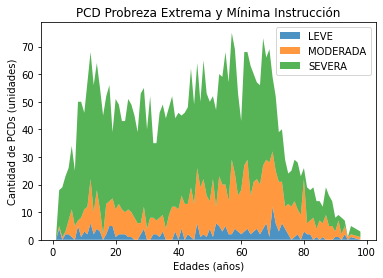

In [39]:
fig, ax = plt.subplots()
ax.stackplot(edades, datoPCDExtremo_dic.values(), labels = datoPCDExtremo.to_dict('dict').keys(), alpha=0.8)

ax.legend(loc='upper right')
ax.set_title('PCD Probreza Extrema y Mínima Instrucción')
ax.set_xlabel('Edades (años)')
ax.set_ylabel('Cantidad de PCDs (unidades)')

plt.show()

### Análisis Visual: PCDs - POBRE Vs Instrucción BÁSICA

In [40]:
condicionFiltro = "((SISFHO == 'POBRE') & (INSTRUCCION == 'PRIM COMPLETA' | INSTRUCCION == 'SEC INCOMPLETA' | INSTRUCCION == 'SEC COMPLETA'))"
dataPCDMedios = dataAllUbigeo.query(condicionFiltro)
#dataPCDMedios.shape

dataPCDMedios = pd.crosstab(dataPCDMedios.EDAD, dataPCDMedios.NIVEL_DISCAPACIDAD)
#dataPCDMedios.head()

edades = dataPCDMedios.index.tolist()
#len(edades), edades[0], edades[len(edades)-1]

dataPCDMedios.to_dict('dict').keys()

dataPCDMedios_dic = dataPCDMedios.to_dict('list')
#dataPCDMedios_dic.values()

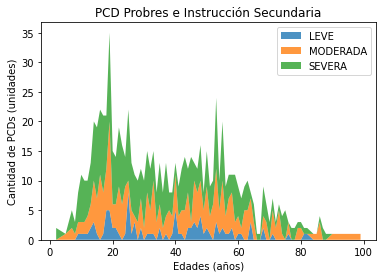

In [41]:
fig, ax = plt.subplots()
ax.stackplot(edades, dataPCDMedios_dic.values(), labels = dataPCDMedios.to_dict('dict').keys(), alpha=0.8)

ax.legend(loc='upper right')
ax.set_title('PCD Probres e Instrucción Secundaria')
ax.set_xlabel('Edades (años)')
ax.set_ylabel('Cantidad de PCDs (unidades)')

plt.show()

### Análisis Visual: PCDs - NO POBRE EXTREMO Vs Instrucción SUPERIOR

In [42]:
condicionFiltro = "((SISFHO == 'NO POBRE') & (INSTRUCCION == 'SUPERIOR'))"
dataPCDAlto = dataAllUbigeo.query(condicionFiltro)
#dataPCDAlto.shape

dataPCDAlto = pd.crosstab(dataPCDAlto.EDAD, dataPCDAlto.NIVEL_DISCAPACIDAD)
#dataPCDAlto.head()

edades = dataPCDAlto.index.tolist()
#len(edades), edades[0], edades[len(edades)-1]

dataPCDAlto.to_dict('dict').keys()

dataPCDAlto_dic = dataPCDAlto.to_dict('list')
#dataPCDAlto_dic.values()

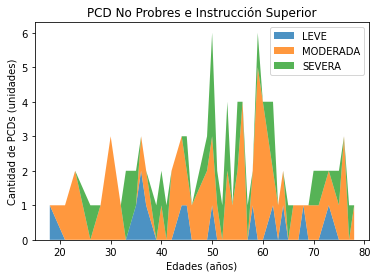

In [43]:
fig, ax = plt.subplots()
ax.stackplot(edades, dataPCDAlto_dic.values(), labels = dataPCDAlto.to_dict('dict').keys(), alpha=0.8)

ax.legend(loc='upper right')
ax.set_title('PCD No Probres e Instrucción Superior')
ax.set_xlabel('Edades (años)')
ax.set_ylabel('Cantidad de PCDs (unidades)')

plt.show()

### Análisis Visual: PCDs - POBRE EXTREMO Vs Instrucción SUPERIOR

In [44]:
condicionFiltro = "((SISFHO == 'POBRE EXTREMO') & (INSTRUCCION == 'SUPERIOR'))"
dataPCDPobreSuperior = dataAllUbigeo.query(condicionFiltro)
#dataPCDPobreSuperior.shape

dataPCDPobreSuperior = pd.crosstab(dataPCDPobreSuperior.EDAD, dataPCDPobreSuperior.NIVEL_DISCAPACIDAD)
#dataPCDPobreSuperior.head()

edades = dataPCDPobreSuperior.index.tolist()
#len(edades), edades[0], edades[len(edades)-1]

dataPCDPobreSuperior.to_dict('dict').keys()

dataPCDPobreSuperior_dic = dataPCDPobreSuperior.to_dict('list')
#dataPCDPobreSuperior_dic.values()

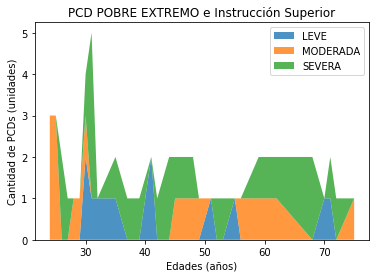

In [45]:
fig, ax = plt.subplots()
ax.stackplot(edades, dataPCDPobreSuperior_dic.values(), labels = dataPCDPobreSuperior.to_dict('dict').keys(), alpha=0.8)

ax.legend(loc='upper right')
ax.set_title('PCD POBRE EXTREMO e Instrucción Superior')
ax.set_xlabel('Edades (años)')
ax.set_ylabel('Cantidad de PCDs (unidades)')

plt.show()